In [71]:
from urllib.request import urlopen
import json
import pandas as pd

In [72]:
response = urlopen('https://api.openf1.org/v1/drivers?session_key=latest')
data = json.loads(response.read().decode('utf-8'))
df = pd.DataFrame(data)
df.head()

,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,driver_number,team_colour,team_name,name_acronym
0,10008,1257,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,1,3671C6,Red Bull Racing,VER
1,10008,1257,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,4,FF8000,McLaren,NOR
2,10008,1257,G BORTOLETO,None,Gabriel,Gabriel BORTOLETO,https://media.formula1.com/d_driver_fallback_i...,Bortoleto,5,52E252,Kick Sauber,BOR
3,10008,1257,I HADJAR,None,Isack,Isack HADJAR,https://media.formula1.com/d_driver_fallback_i...,Hadjar,6,6692FF,Racing Bulls,HAD
4,10008,1257,J DOOHAN,None,Jack,Jack DOOHAN,https://media.formula1.com/d_driver_fallback_i...,Doohan,7,0093CC,Alpine,DOO


In [73]:
response = urlopen('https://api.openf1.org/v1/meetings?year=2025&')
data_meetings = json.loads(response.read().decode('utf-8'))
df_meetings = pd.DataFrame(data_meetings)
df_meetings.head()

,circuit_key,circuit_short_name,country_code,country_key,country_name,date_start,gmt_offset,location,meeting_code,meeting_key,meeting_name,meeting_official_name,year
0,63,Sakhir,BRN,36,Bahrain,2025-02-26T07:00:00+00:00,03:00:00,Sakhir,BRN,1253,Pre-Season Testing,FORMULA 1 ARAMCO PRE-SEASON TESTING 2025,2025
1,10,Melbourne,AUS,5,Australia,2025-03-14T01:30:00+00:00,11:00:00,Melbourne,AUS,1254,Australian Grand Prix,FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...,2025
2,49,Shanghai,CHN,53,China,2025-03-21T03:30:00+00:00,08:00:00,Shanghai,CHN,1255,Chinese Grand Prix,FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025,2025
3,46,Suzuka,JPN,4,Japan,2025-04-04T02:30:00+00:00,09:00:00,Suzuka,JPN,1256,Japanese Grand Prix,FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025,2025
4,63,Sakhir,BRN,36,Bahrain,2025-04-11T11:30:00+00:00,03:00:00,Sakhir,BRN,1257,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025,2025


In [74]:
response = urlopen('https://api.openf1.org/v1/position?session_key=10006')
data_position = json.loads(response.read().decode('utf-8'))
df_position = pd.DataFrame(data_position)
df_position

,session_key,meeting_key,driver_number,date,position
0,10006,1256,1,2025-04-06T04:07:42.788000+00:00,1
1,10006,1256,4,2025-04-06T04:07:42.788000+00:00,2
2,10006,1256,5,2025-04-06T04:07:42.788000+00:00,17
3,10006,1256,6,2025-04-06T04:07:42.788000+00:00,7
4,10006,1256,7,2025-04-06T04:07:42.788000+00:00,19
...,...,...,...,...,...
243,10006,1256,55,2025-04-06T05:57:48.189000+00:00,17
244,10006,1256,30,2025-04-06T06:01:00.896000+00:00,17
245,10006,1256,55,2025-04-06T06:01:00.896000+00:00,16
246,10006,1256,7,2025-04-06T06:22:34.690000+00:00,15


/tmp/ipykernel_12623/4086914300.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_position['date'] = pd.to_datetime(df_position['date']).dt.strftime('%H:%M:%S');


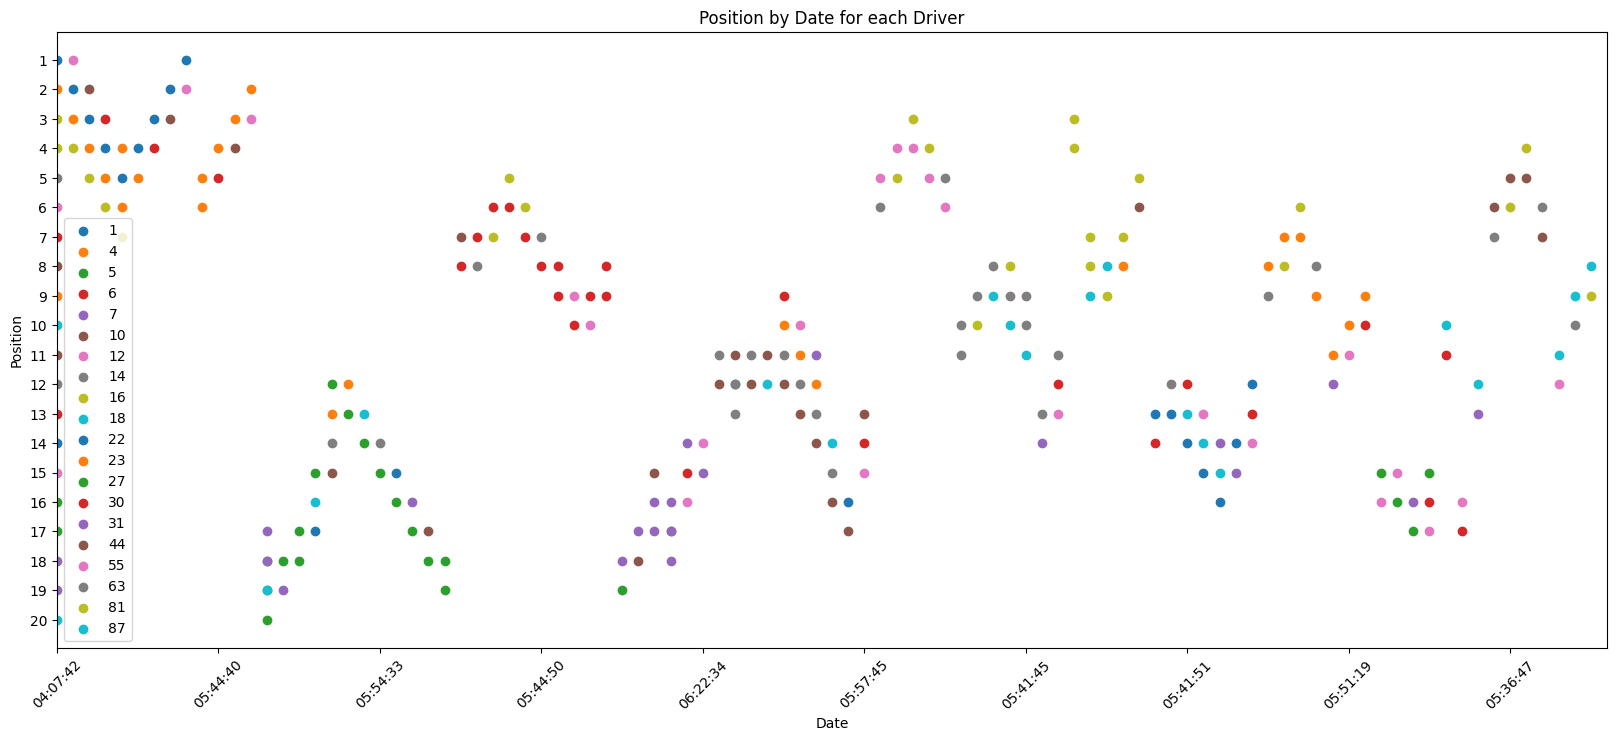

In [87]:
import matplotlib.pyplot as plt

# aumenta o tamanho do gráfico
plt.figure(figsize=(20, 8))
# a coluna date tá no formato timestamp, então converte para datetime apenas com as horas, minutos e segundos
df_position['date'] = pd.to_datetime(df_position['date']).dt.strftime('%H:%M:%S');
# para cada "driver_number" quero plotar uma linha da "position" (eixo Y) pelo tempo "date" (eixo X)
# quero uma cor diferente para cada driver_number
for driver_number in df_position['driver_number'].unique():
    df_driver = df_position[df_position['driver_number'] == driver_number]
    plt.scatter(df_driver['date'], df_driver['position'], label=driver_number)


# ordena o y de forma decrescente
plt.gca().invert_yaxis()
# quero ticls de 1 a 20 no eixo y
plt.yticks(range(1, 21))
plt.xlim(["04:07:42", "05:40:00"])
# limitar a 10 ticks no eixo x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Position')
plt.title('Position by Date for each Driver')
plt.legend()
plt.show() 